<a href="https://colab.research.google.com/github/divyanshu905/Masculinity_survey_analysis/blob/master/Masculinity_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("raw-responses.csv")
df.head(5)

,Unnamed: 0,StartDate,EndDate,q0001,q0002,q0004_0001,q0004_0002,q0004_0003,q0004_0004,q0004_0005,...,q0035,q0036,race2,racethn4,educ3,educ4,age3,kids,orientation,weight
0,1,5/10/18 4:01,5/10/18 4:06,Somewhat masculine,Somewhat important,Not selected,Not selected,Not selected,Pop culture,Not selected,...,Middle Atlantic,Windows Desktop / Laptop,Non-white,Hispanic,College or more,College or more,35 - 64,No children,Gay/Bisexual,1.714026
1,2,5/10/18 6:30,5/10/18 6:53,Somewhat masculine,Somewhat important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,iOS Phone / Tablet,White,White,Some college,Some college,65 and up,Has children,Straight,1.247120
2,3,5/10/18 7:02,5/10/18 7:09,Very masculine,Not too important,Father or father figure(s),Not selected,Not selected,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,Has children,Straight,0.515746
3,4,5/10/18 7:27,5/10/18 7:31,Very masculine,Not too important,Father or father figure(s),Mother or mother figure(s),Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,Some college,Some college,65 and up,Has children,No answer,0.600640
4,5,5/10/18 7:35,5/10/18 7:42,Very masculine,Very important,Not selected,Not selected,Other family members,Not selected,Not selected,...,East North Central,Windows Desktop / Laptop,White,White,College or more,College or more,35 - 64,No children,Straight,1.033400


In [ ]:
# df.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df.columns

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [ ]:
df.fillna("Not Answered", inplace=True)

In [ ]:
def set_custom_palette(series, max_color = 'turquoise', other_color = 'lightgrey'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

In [ ]:
def countplot_questions(column, data, title):
  ax = sns.countplot(y=column, data=data, order=data[column].value_counts().index, palette=set_custom_palette(data[column].value_counts()))
  ax.set_title(title)
  ax.set(ylabel=None)
  total = float(len(data))
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
  plt.show()

In [ ]:
age_crosstab = pd.crosstab(df['q0001'], df['age3'], rownames=['q0001'], colnames=['age3'])
age_crosstab

age3,18 - 34,35 - 64,65 and up
q0001,,,
No answer,0,9,5
Not at all masculine,9,13,10
Not very masculine,17,66,48
Somewhat masculine,62,445,319
Very masculine,45,322,245


In [ ]:
def demo_barplot_questions(row, column, data, title):
  ct = pd.crosstab(data[row], data[column], rownames=[row], colnames=[column])
  num_cols = len(ct.columns)

  fig, axs = plt.subplots(1, num_cols, sharey=True, figsize=(15, 7))
  fig.suptitle(title)
  for i in range(num_cols):
    sns.barplot(x=ct.columns[i], y=ct.index, data=ct, palette=set_custom_palette(ct.iloc[:, i]), ax=axs[i])
    axs[i].set(ylabel=None)
    total = float(ct.iloc[:, i].sum())
    for p in axs[i].patches:
      percentage = '{:.1f}%'.format(100 * p.get_width()/total)
      x = p.get_x() + p.get_width() + 0.02
      y = p.get_y() + p.get_height()/2
      axs[i].annotate(percentage, (x, y))
  plt.show()

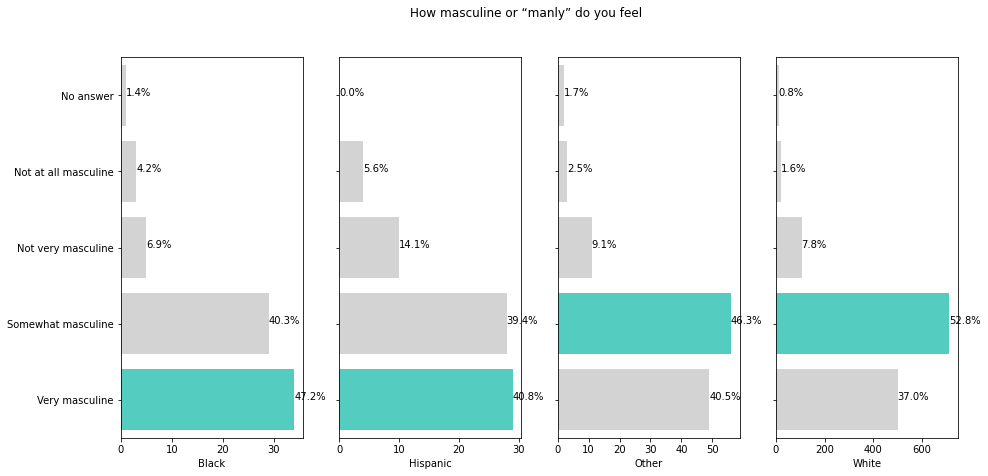

In [ ]:
demo_barplot_questions('q0001', 'racethn4', df, "How masculine or “manly” do you feel")

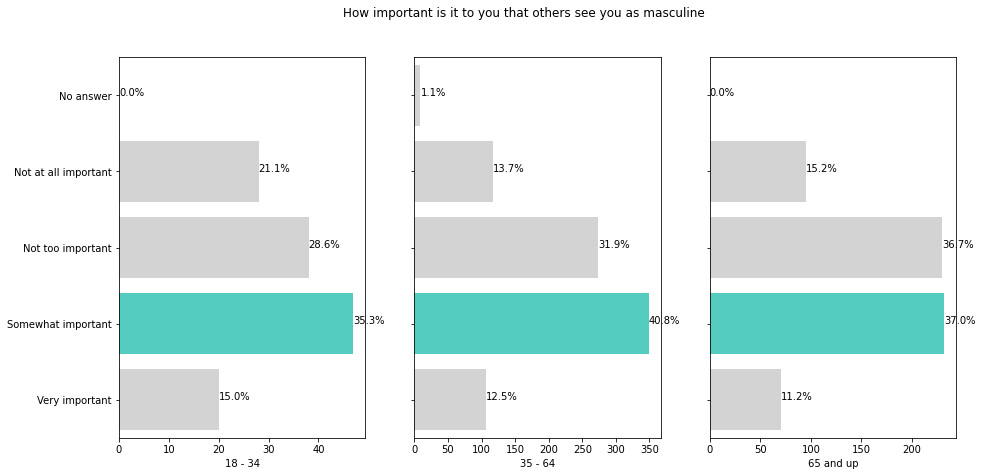

In [ ]:
demo_barplot_questions("q0002", "age3", df, "How important is it to you that others see you as masculine")

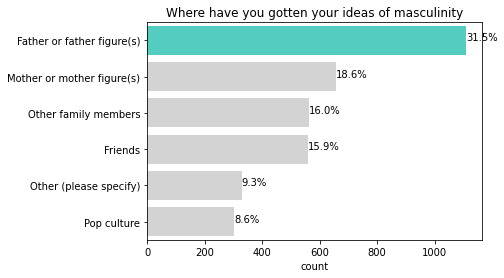

In [ ]:
q4 = df.loc[:, df.columns.str.contains("q0004")].unstack().to_frame().reset_index(drop=True)
q4 = q4[~q4[0].str.contains("Not selected")==True]
countplot_questions(0, q4, "Where have you gotten your ideas of masculinity")

Text(0.5, 1.0, 'Do you think society puts unhealthy pressure on men')

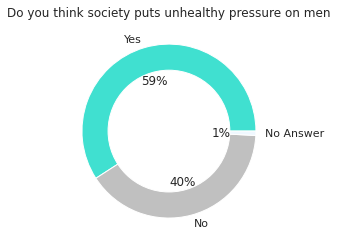

In [ ]:
sns.set()
sns.set_style('whitegrid')
ax3 = plt.pie(df['q0005'].value_counts(), labels=['Yes', 'No', 'No Answer'], colors=['turquoise', 'silver', 'aliceblue'], autopct='%.0f%%')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Do you think society puts unhealthy pressure on men")

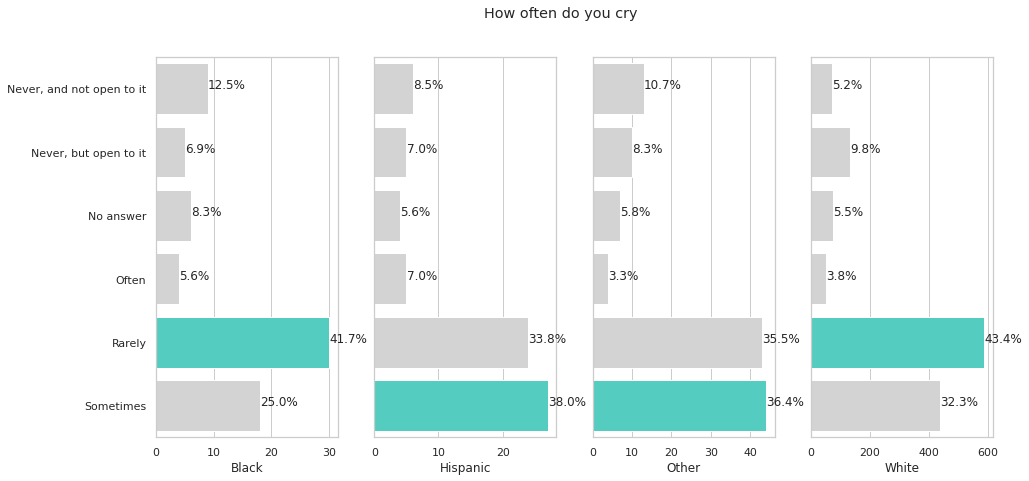

In [ ]:
demo_barplot_questions("q0007_0004", "racethn4", df, "How often do you cry")

In [ ]:
q10 = df.loc[:, df.columns.str.contains("q0010")].unstack().to_frame().reset_index(drop=True)
q10 = q10.loc[q10[0].str.contains("None of the above|Not selected|Not Answered") == False]

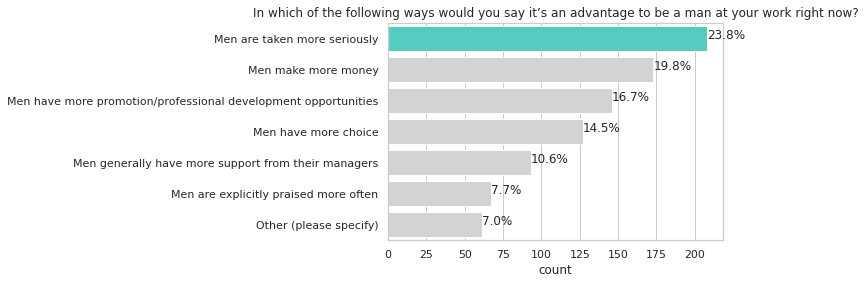

In [ ]:
countplot_questions(0, q10, "In which of the following ways would you say it’s an ​advantage​ to be a man at your work right now?")

In [ ]:
q11 = df.loc[:, df.columns.str.contains("q0011")].unstack().to_frame().reset_index(drop=True)
q11 = q11.loc[q11[0].str.contains("Not selected|Not Answered") == False]

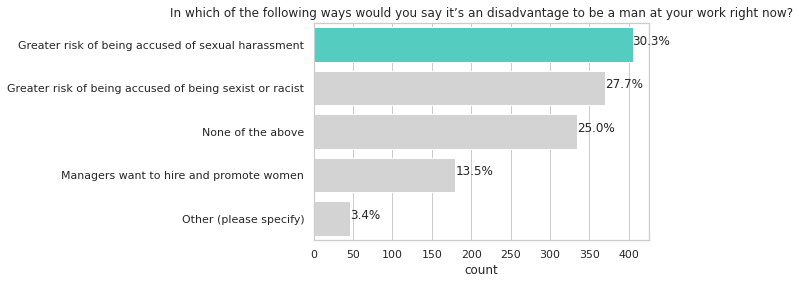

In [ ]:
countplot_questions(0, q11, "In which of the following ways would you say it’s an ​disadvantage​ to be a man at your work right now?")

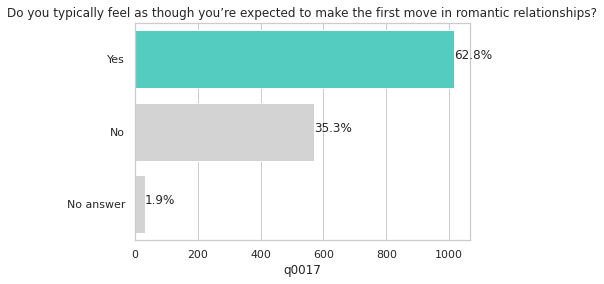

In [ ]:
ax = sns.barplot(y=df.q0017.value_counts().index, x=df.q0017.value_counts(), palette=set_custom_palette(df.q0017.value_counts()))
ax.set_title("Do you typically feel as though you’re expected to make the first move in romantic relationships?")
total = float(len(df))
for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_width()/total)
  x = p.get_x() + p.get_width() + 0.02
  y = p.get_y() + p.get_height()/2
  ax.annotate(percentage, (x,y))

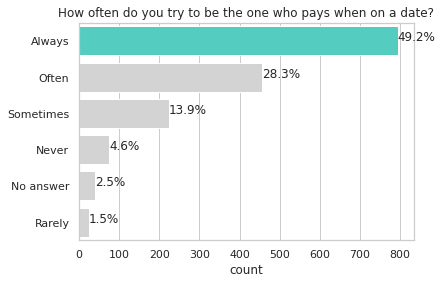

In [ ]:
countplot_questions("q0018", df, "How often do you try to be the one who pays when on a date?")